### **Customer Segmentation**

Importing the libraries

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import scipy as sc
import matplotlib as mpl

In [ ]:
import itertools

Loading the dataset

In [ ]:
data = pd.read_csv("/Mall_Customers.csv")
data.shape
data.head(5)

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40


In [ ]:
data.head()



,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40


In [ ]:
data.describe()

,Annual Income (k$),Spending Score (1-100)
count,200.000000,200.000000
mean,60.560000,50.200000
std,26.264721,25.823522
min,15.000000,1.000000
25%,41.500000,34.750000
50%,61.500000,50.000000
75%,78.000000,73.000000
max,137.000000,99.000000


In [ ]:
data.shape

(200, 5)

Missing data & Type of variables

In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 5 columns):
 #   Column                  Non-Null Count  Dtype 
---  ------                  --------------  ----- 
 0   CustomerID              200 non-null    int64 
 1   Gender                  200 non-null    object
 2   Age                     200 non-null    int64 
 3   Annual Income (k$)      200 non-null    int64 
 4   Spending Score (1-100)  200 non-null    int64 
dtypes: int64(4), object(1)
memory usage: 7.9+ KB


Transforming specific variables into categorical variables

In [ ]:
data['CustomerID'] = data['CustomerID'].astype('category')
data['Age'] = data['Age'].astype('category')
data.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 5 columns):
 #   Column                  Non-Null Count  Dtype   
---  ------                  --------------  -----   
 0   CustomerID              200 non-null    category
 1   Gender                  200 non-null    object  
 2   Age                     200 non-null    category
 3   Annual Income (k$)      200 non-null    int64   
 4   Spending Score (1-100)  200 non-null    int64   
dtypes: category(2), int64(2), object(1)
memory usage: 17.5+ KB


**Data pre-processing for model**

In [ ]:
X = data
num_cols = ["CustomerID", "Age", "Annual Income (k$)", "Spending Score (1-100)"]


cat_cols = ["CustomerID", "Age"]
dummies = pd.get_dummies(X[cat_cols])




X1 = X[num_cols]
X2 = pd.concat([dummies, X1], axis=1)
X = X2



y = data["Age"]



from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.25, random_state = 0)
X_train.head(5)

X_test0 = X_test
y_test0 = y_test

**Principal component analysis**

In [ ]:
from sklearn.decomposition import PCA
pca = PCA(n_components = None)
X_train1 = pca.fit_transform(X_train)
X_test1 = pca.transform(X_test)
explained_variance = pca.explained_variance_ratio_
print("Variation explained by each principal component")
list(explained_variance)

Variation explained by each principal component


[0.8203436516479731,
 0.1361201098899423,
 0.036837243858373794,
 0.006308494414540493,
 1.3308997248791552e-05,
 1.0665126127310345e-05,
 9.497918684497647e-06,
 9.272571858761213e-06,
 8.260571087239395e-06,
 8.26057108723939e-06,
 8.255573739837398e-06,
 8.157566565540256e-06,
 7.916661211986905e-06,
 7.775264695115672e-06,
 7.377558896047119e-06,
 6.883809239366143e-06,
 6.8346934875421356e-06,
 6.692767344042977e-06,
 6.469048389070563e-06,
 6.379888918736801e-06,
 5.98477440857714e-06,
 5.50704739149292e-06,
 5.50704739149292e-06,
 5.507047391492916e-06,
 5.507047391492915e-06,
 5.507047391492915e-06,
 5.378537749647055e-06,
 5.332042167084338e-06,
 5.112171660987447e-06,
 4.674295866709193e-06,
 4.3077810142530016e-06,
 4.130285543619693e-06,
 4.130285543619691e-06,
 4.130285543619686e-06,
 4.130285543619686e-06,
 4.130285543619683e-06,
 3.916502040373434e-06,
 3.7829904912008548e-06,
 3.6745517507128253e-06,
 3.2004257393242893e-06,
 2.8251184768747982e-06,
 2.7535236957464622e

Selecting the top 2 principal components

In [ ]:
i = 2
from sklearn.decomposition import PCA
pca = PCA(n_components = i)
X_train = pca.fit_transform(X_train)
X_test = pca.transform(X_test)
explained_variance = pca.explained_variance_ratio_
print("Variation explained by each principal component")
list(explained_variance)

Variation explained by each principal component


[0.8203436516479731, 0.1361201098899423]

**Customer segmentation**

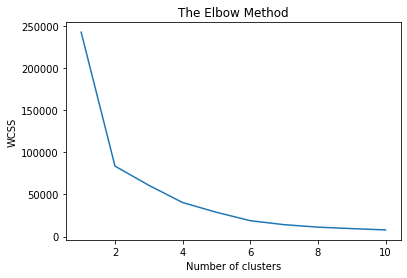

In [ ]:
from sklearn.cluster import KMeans
wcss = []
for i in range(1, 11):
    kmeans = KMeans(n_clusters = i, init = 'k-means++', random_state = 42)
    kmeans.fit(X_test)
    wcss.append(kmeans.inertia_)
plt.plot(range(1, 11), wcss)
plt.title('The Elbow Method')
plt.xlabel('Number of clusters')
plt.ylabel('WCSS')
plt.show()

Distribution of Customers in each segment

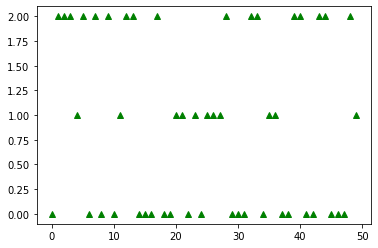

In [ ]:
X3 = X_test
kmeans = KMeans(n_clusters = 3, init = 'k-means++', random_state = 42)
y_kmeans = kmeans.fit_predict(X3)
plt.plot(y_kmeans, 'g^')
plt.show()

Visualizing customer segments

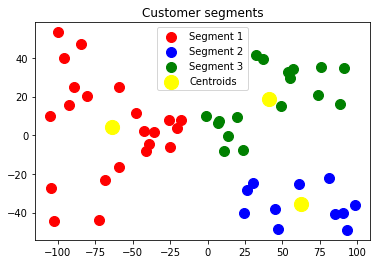

In [ ]:
plt.scatter(X3[y_kmeans == 0, 0], X3[y_kmeans == 0, 1], s = 100, c = 'red', label = 'Segment 1')
plt.scatter(X3[y_kmeans == 1, 0], X3[y_kmeans == 1, 1], s = 100, c = 'blue', label = 'Segment 2')
plt.scatter(X3[y_kmeans == 2, 0], X3[y_kmeans == 2, 1], s = 100, c = 'green', label = 'Segment 3')
plt.scatter(kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:, 1], s = 200, c = 'yellow', label = 'Centroids')
plt.title('Customer segments')
plt.legend()
plt.show()

Customer Segments

In [ ]:
Customer_segment_class = pd.DataFrame(y_kmeans)
Customer_segment_class.columns = ["Customer_segment_class"]
X_test2 = X_test0.reset_index(drop=True)

Customer_segments = pd.concat([Customer_segment_class, X_test2], axis = 1)

Customer Segments

In [ ]:
# 1st Cluster
mask = Customer_segments["Customer_segment_class"] == 0
Customer_segments_1 = Customer_segments[mask]

# 2nd Cluster
mask = Customer_segments["Customer_segment_class"] == 1
Customer_segments_2 = Customer_segments[mask]

# 3rd Cluster
mask = Customer_segments["Customer_segment_class"] == 2
Customer_segments_3 = Customer_segments[mask]

Customer Segment Features

In [ ]:
Customer_segments_1.groupby(["CustomerID", "Age"]).size()
Customer_segments_2.groupby(["CustomerID", "Age"]).size()
Customer_segments_3.groupby(["CustomerID", "Age"]).size()

CustomerID  Age
1           18     0
            19     0
            20     0
            21     0
            22     0
                  ..
200         66     0
            67     0
            68     0
            69     0
            70     0
Length: 10200, dtype: int64